<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_09_class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load & Preprocess Data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from data_utils import (load_data_from_url, clean_column_names, remove_id_column,
                        rename_columns, convert_categorical, preprocess_data, split_data, plot_class_distribution,
                        create_preprocessing_pipeline, add_model_to_pipeline, evaluate_model,
                        hyperparameter_tuning)

# Define your parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'


# Load and Preprocess Data
data = preprocess_data(url, categorical_columns)

# Check if data is loaded and preprocessed correctly
if data is not None:
    # Split the data
    X_train, X_test, y_train, y_test = split_data(data, target=target)

    # Define preprocessing steps for numerical and categorical columns
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()

    # Create preprocessing pipeline
    pipeline = create_preprocessing_pipeline(numeric_features, categorical_features)
else:
    print("Data preprocessing failed. Please check the URL and preprocessing steps.")

Preprocessing pipeline created successfully.


### Class Imbalance

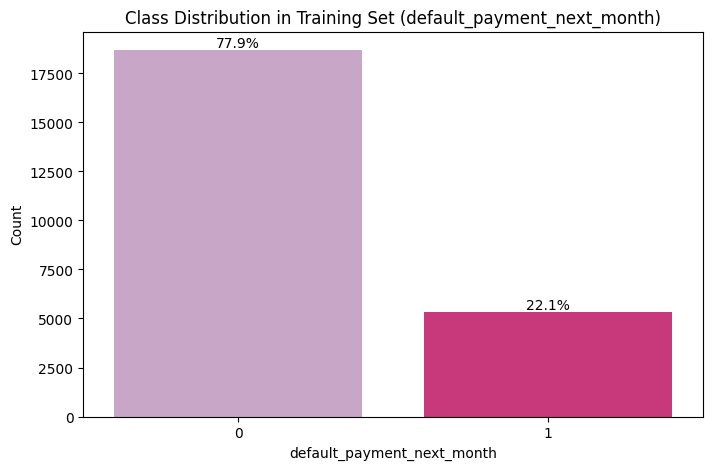

In [15]:
plot_class_distribution(y_train, target)

#### evaluate model dictioonary of classifcation report

In [40]:
# from sklearn.metrics import classification_report
# import pandas as pd

# # def get_classification_report(y_true, y_pred, model_name):
# #     report = classification_report(y_true, y_pred, output_dict=True)
# #     df = pd.DataFrame(report).transpose()
# #     df['model'] = model_name
# #     return df

# from sklearn.metrics import classification_report
# import pandas as pd

# # def get_classification_report(y_true, y_pred, model_name):
# #     # Generate the classification report as a dictionary
# #     report_dict = classification_report(y_true, y_pred, output_dict=True)

# #     # Convert the dictionary to a DataFrame
# #     df = pd.DataFrame(report_dict).transpose()
# #     df['model'] = model_name

# #     # Print the classification report
# #     print(f"Classification Report for {model_name}:\n")
# #     print(classification_report(y_true, y_pred))

# #     return df

# from sklearn.metrics import classification_report

# def get_classification_report_dict(y_true, y_pred, model_name):
#     """
#     Generate the classification report as a dictionary.

#     Parameters:
#     - y_true: array-like, true labels
#     - y_pred: array-like, predicted labels
#     - model_name: str, name of the model

#     Returns:
#     - dict, classification report dictionary
#     """
#     report_dict = classification_report(y_true, y_pred, output_dict=True)

#     # Print the classification report
#     print(f"Classification Report for {model_name}:\n")
#     print(classification_report(y_true, y_pred))

#     return report_dict

# import pandas as pd

# def extract_key_metrics_from_report(report_dict, model_name):
#     """
#     Extract key metrics from the classification report dictionary.

#     Parameters:
#     - report_dict: dict, classification report dictionary
#     - model_name: str, name of the model

#     Returns:
#     - pd.DataFrame, DataFrame with the selected metrics
#     """
#     # Define the metrics and classes you want to focus on
#     desired_metrics = ['recall', 'f1-score']
#     desired_classes = ['0', '1', 'macro avg']

#     # Extract the metrics
#     metrics_data = {
#         'model': model_name,
#         'recall_0': report_dict['0']['recall'],
#         'recall_1': report_dict['1']['recall'],
#         'f1_score_0': report_dict['0']['f1-score'],
#         'f1_score_1': report_dict['1']['f1-score'],
#         'macro_avg_recall': report_dict['macro avg']['recall'],
#         'macro_avg_f1_score': report_dict['macro avg']['f1-score']
#     }

#     return pd.DataFrame([metrics_data])

# # Example usage
# y_true = [0, 1, 0, 1, 0, 1, 1, 1]  # Example true labels
# y_pred = [0, 0, 0, 1, 0, 1, 0, 1]  # Example predicted labels
# model_name = "Example Model"

# # Get the classification report dictionary
# report_dict = get_classification_report_dict(y_true, y_pred, model_name)

# # Extract key metrics and convert to DataFrame
# key_metrics_df = extract_key_metrics_from_report(report_dict, model_name)
# print(key_metrics_df)



Classification Report for Example Model:

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8

           model  recall_0  recall_1  f1_score_0  f1_score_1  \
0  Example Model       1.0       0.6        0.75        0.75   

   macro_avg_recall  macro_avg_f1_score  
0               0.8                0.75  


In [44]:
# Define the key metrics and classes you want to focus on
desired_metrics = ['recall', 'f1-score']
desired_classes = ['0', '1', 'macro avg']

from sklearn.metrics import classification_report

def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate the model and return the classification report as a dictionary.

    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels
    - model_name: str, name of the model

    Returns:
    - dict, classification report dictionary
    """
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    # Print the classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred))

    # Add model name to the dictionary
    report_dict['model'] = model_name

    return report_dict

# aggregate classificatio reports
def aggregate_reports(reports_list, new_report):
    """
    Aggregate classification reports into a list.

    Parameters:
    - reports_list: list, list of classification reports
    - new_report: dict, new classification report to add

    Returns:
    - list, updated list of classification reports
    """
    reports_list.append(new_report)
    return reports_list

import pandas as pd

def extract_key_metrics(reports_list, metrics, classes):
    """
    Extract key metrics from the aggregated classification reports.

    Parameters:
    - reports_list: list, list of classification reports
    - metrics: list of str, metrics to extract
    - classes: list of str, classes to include in the comparison

    Returns:
    - pd.DataFrame, DataFrame with the selected metrics
    """
    extracted_metrics = []

    for report in reports_list:
        model_name = report['model']
        for cls in classes:
            for metric in metrics:
                metric_value = report[cls][metric]
                extracted_metrics.append({
                    'model': model_name,
                    'class': cls,
                    'metric': metric,
                    'value': metric_value
                })

    return pd.DataFrame(extracted_metrics)

# Example usage
desired_metrics = ['recall', 'f1-score']
desired_classes = ['0', '1', 'macro avg']

# # Assuming `all_reports` is a list of all classification reports
# key_metrics_df = extract_key_metrics(all_reports, desired_metrics, desired_classes)
# print(key_metrics_df)



In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty list to store all reports
all_reports = []

# Logistic Regression with SMOTE
model = LogisticRegression(max_iter=500, random_state=42)
smote = SMOTE(random_state=42)
pipeline_with_smote = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('smote', smote),
    ('model', model)
])
pipeline_with_smote.fit(X_train, y_train)
y_pred_smote = pipeline_with_smote.predict(X_test)
report_smote = evaluate_model(y_test, y_pred_smote, "Logistic Regression with SMOTE")
all_reports = aggregate_reports(all_reports, report_smote)

# Logistic Regression with Undersampling
undersample = RandomUnderSampler(random_state=42)
pipeline_with_undersample = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('undersample', undersample),
    ('model', model)
])
pipeline_with_undersample.fit(X_train, y_train)
y_pred_undersample = pipeline_with_undersample.predict(X_test)
report_undersample = evaluate_model(y_test, y_pred_undersample, "Logistic Regression with Undersampling")
all_reports = aggregate_reports(all_reports, report_undersample)

# RandomForest with SMOTE
rf_model = RandomForestClassifier(random_state=42)
pipeline_with_rf_smote = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('smote', smote),
    ('model', rf_model)
])
pipeline_with_rf_smote.fit(X_train, y_train)
y_pred_rf_smote = pipeline_with_rf_smote.predict(X_test)
report_rf_smote = evaluate_model(y_test, y_pred_rf_smote, "RandomForest with SMOTE")
all_reports = aggregate_reports(all_reports, report_rf_smote)

# RandomForest with Undersampling
pipeline_with_rf_undersample = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('undersample', undersample),
    ('model', rf_model)
])
pipeline_with_rf_undersample.fit(X_train, y_train)
y_pred_rf_undersample = pipeline_with_rf_undersample.predict(X_test)
report_rf_undersample = evaluate_model(y_test, y_pred_rf_undersample, "RandomForest with Undersampling")
all_reports = aggregate_reports(all_reports, report_rf_undersample)


Classification Report for Logistic Regression with SMOTE:

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000

Classification Report for Logistic Regression with Undersampling:

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.37      0.63      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

Classification Report for RandomForest with SMOTE:

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.47      0.51      1327

    

In [46]:
# Extract and display the key metrics
key_metrics_df = extract_key_metrics(all_reports, desired_metrics, desired_classes)
print(key_metrics_df)


                                     model      class    metric     value
0           Logistic Regression with SMOTE          0    recall  0.680291
1           Logistic Regression with SMOTE          0  f1-score  0.762624
2           Logistic Regression with SMOTE          1    recall  0.634514
3           Logistic Regression with SMOTE          1  f1-score  0.459732
4           Logistic Regression with SMOTE  macro avg    recall  0.657402
5           Logistic Regression with SMOTE  macro avg  f1-score  0.611178
6   Logistic Regression with Undersampling          0    recall  0.693131
7   Logistic Regression with Undersampling          0  f1-score  0.770823
8   Logistic Regression with Undersampling          1    recall  0.629239
9   Logistic Regression with Undersampling          1  f1-score  0.464405
10  Logistic Regression with Undersampling  macro avg    recall  0.661185
11  Logistic Regression with Undersampling  macro avg  f1-score  0.617614
12                 RandomForest with S

### Logistic Regression with SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(max_iter=500, random_state=42)

# Resampling using SMOTE
smote = SMOTE(random_state=42)
pipeline_with_smote = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('smote', smote),
    ('model', model)
])

# Fit the pipeline with SMOTE
pipeline_with_smote.fit(X_train, y_train)

# Transform the test data and evaluate the model
y_pred_smote = pipeline_with_smote.predict(X_test)
report_smote = get_classification_report(y_test, y_pred_smote, "Logistic Regression with SMOTE")

Classification Report for Logistic Regression with SMOTE:

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000



### Logistic Regression with Undersampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler

# Resampling using RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
pipeline_with_undersample = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('undersample', undersample),
    ('model', model)
])

# Fit the pipeline with undersampling
pipeline_with_undersample.fit(X_train, y_train)

# Transform the test data and evaluate the model
y_pred_undersample = pipeline_with_undersample.predict(X_test)
report_undersample = get_classification_report(y_test, y_pred_undersample, "Logistic Regression with Undersampling")


Classification Report for Logistic Regression with Undersampling:

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.37      0.63      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



### RandomForest with SMOTE

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Add the model to the pipeline
pipeline_with_rf_smote = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('smote', smote),
    ('model', rf_model)
])

# Fit the pipeline with RandomForest and SMOTE
pipeline_with_rf_smote.fit(X_train, y_train)

# Transform the test data and evaluate the model
y_pred_rf_smote = pipeline_with_rf_smote.predict(X_test)
report_rf_smote = get_classification_report(y_test, y_pred_rf_smote, "RandomForest with SMOTE")

Classification Report for RandomForest with SMOTE:

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.47      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



### RandomForest with Undersampling

In [30]:
# Resampling using RandomUnderSampler
pipeline_with_rf_undersample = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('undersample', undersample),
    ('model', rf_model)
])

# Fit the pipeline with RandomForest and undersampling
pipeline_with_rf_undersample.fit(X_train, y_train)

# Transform the test data and evaluate the model
y_pred_rf_undersample = pipeline_with_rf_undersample.predict(X_test)
report_rf_undersample = get_classification_report(y_test, y_pred_rf_undersample, "RandomForest with Undersampling")


Classification Report for RandomForest with Undersampling:

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4673
           1       0.45      0.62      0.52      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.75      0.76      6000



In [35]:
# Combine all reports
comparison_df = pd.concat([report_smote, report_undersample, report_rf_smote, report_rf_undersample])

# Reset index for better readability
comparison_df = comparison_df.reset_index()

# Display the comparison DataFrame
comparison_df

,index,precision,recall,f1-score,support,model
0,0,0.867631,0.680291,0.762624,4673.000000,Logistic Regression with SMOTE
1,1,0.360445,0.634514,0.459732,1327.000000,Logistic Regression with SMOTE
2,accuracy,0.670167,0.670167,0.670167,0.670167,Logistic Regression with SMOTE
3,macro avg,0.614038,0.657402,0.611178,6000.000000,Logistic Regression with SMOTE
4,weighted avg,0.755458,0.670167,0.695635,6000.000000,Logistic Regression with SMOTE
5,0,0.868132,0.693131,0.770823,4673.000000,Logistic Regression with Undersampling
6,1,0.368004,0.629239,0.464405,1327.000000,Logistic Regression with Undersampling
7,accuracy,0.679000,0.679000,0.679000,0.679000,Logistic Regression with Undersampling
8,macro avg,0.618068,0.661185,0.617614,6000.000000,Logistic Regression with Undersampling
9,weighted avg,0.757520,0.679000,0.703054,6000.000000,Logistic Regression with Undersampling


In [38]:
def extract_key_metrics(comparison_df, metrics, classes=['1', 'recall', 'f1', 'macro avg']):
    """
    Extract key metrics from the comparison DataFrame.

    Parameters:
    - comparison_df: pd.DataFrame, DataFrame containing the classification reports for different models
    - metrics: list of str, metrics to extract (e.g., ['recall', 'f1-score'])
    - classes: list of str, classes to include in the comparison (default is ['1', 'accuracy', 'macro avg'])

    Returns:
    - pd.DataFrame, DataFrame with the selected metrics for the specified classes
    """
    # Filter the DataFrame to include only the desired metrics and classes
    filtered_df = comparison_df[comparison_df['index'].isin(classes)]

    # Select only the desired metrics and the model column
    filtered_df = filtered_df[['index'] + metrics + ['model']]

    # Pivot the DataFrame for better comparison
    pivot_df = filtered_df.pivot(index='index', columns='model', values=metrics)

    return pivot_df

# Define the metrics and classes you want to focus on
desired_metrics = ['recall', 'f1-score']
desired_classes = ['1', 'accuracy', 'macro avg']

# Extract and display the key metrics
key_metrics_df = extract_key_metrics(comparison_df, desired_metrics, desired_classes)
print(key_metrics_df)


                                  recall  \
model     Logistic Regression with SMOTE   
index                                      
1                               0.634514   
accuracy                        0.670167   
macro avg                       0.657402   

                                                                          \
model     Logistic Regression with Undersampling RandomForest with SMOTE   
index                                                                      
1                                       0.629239                0.472494   
accuracy                                0.679000                0.796167   
macro avg                               0.661185                0.680287   

                                                                f1-score  \
model     RandomForest with Undersampling Logistic Regression with SMOTE   
index                                                                      
1                                0.624717         

In [37]:
def extract_key_metrics(comparison_df, metrics, classes=['1', 'accuracy', 'macro avg']):
    """
    Extract key metrics from the comparison DataFrame.

    Parameters:
    - comparison_df: pd.DataFrame, DataFrame containing the classification reports for different models
    - metrics: list of str, metrics to extract (e.g., ['recall', 'f1-score'])
    - classes: list of str, classes to include in the comparison (default is ['1', 'accuracy', 'macro avg'])

    Returns:
    - pd.DataFrame, DataFrame with the selected metrics for the specified classes
    """
    # Filter the DataFrame to include only the desired metrics and classes
    filtered_df = comparison_df[comparison_df['index'].isin(classes)]
    filtered_df = filtered_df[metrics + ['model']]

    # Pivot the DataFrame for better comparison
    pivot_df = filtered_df.pivot(index='index', columns='model', values=metrics)

    return pivot_df

# Define the metrics and classes you want to focus on
desired_metrics = ['recall', 'f1-score']
desired_classes = ['1', 'macro avg']

# Extract and display the key metrics
key_metrics_df = extract_key_metrics(comparison_df, desired_metrics, desired_classes)
print(key_metrics_df)


KeyError: 'index'

In [36]:
# Function to Extract Key Metrics
def extract_key_metrics(comparison_df, metrics, classes=['1', 'accuracy']):
    """
    Extract key metrics from the comparison DataFrame.

    Parameters:
    - comparison_df: pd.DataFrame, DataFrame containing the classification reports for different models
    - metrics: list of str, metrics to extract (e.g., ['recall', 'f1-score'])
    - classes: list of str, classes to include in the comparison (default is ['1', 'accuracy'])

    Returns:
    - pd.DataFrame, DataFrame with the selected metrics for the specified classes
    """
    # Filter the DataFrame to include only the desired metrics and classes
    filtered_df = comparison_df[comparison_df['index'].isin(classes)]
    filtered_df = filtered_df[metrics + ['model']]

    # Pivot the DataFrame for better comparison
    pivot_df = filtered_df.pivot(index='index', columns='model', values=metrics)

    return pivot_df

# Define the metrics and classes you want to focus on
desired_metrics = ['recall', 'f1-score', 'f1-score macro']
desired_classes = ['1', 'accuracy']

# Extract and display the key metrics
key_metrics_df = extract_key_metrics(comparison_df, desired_metrics, desired_classes)
print(key_metrics_df)


KeyError: "['f1-score macro'] not in index"

### Class Weights

In [ ]:
# Logistic Regression with class weights
model_with_weights = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
pipeline_with_weights = add_model_to_pipeline(pipeline, model_with_weights)

# Fit the pipeline with class weights
pipeline_with_weights.fit(X_train, y_train)

# Transform the test data and evaluate the model
evaluate_model(pipeline_with_weights, X_test, y_test)


### Evaluation

In [ ]:
# Compare the performance of different methods
# You can store the results of each method and plot them for comparison

# Example: Logistic Regression without balancing
print("Logistic Regression without balancing")
evaluate_model(pipeline_with_model, X_test, y_test)

# Logistic Regression with SMOTE
print("Logistic Regression with SMOTE")
evaluate_model(pipeline_with_smote, X_test, y_test)

# Logistic Regression with undersampling
print("Logistic Regression with undersampling")
evaluate_model(pipeline_with_undersample, X_test, y_test)

# Logistic Regression with class weights
print("Logistic Regression with class weights")
evaluate_model(pipeline_with_weights, X_test, y_test)


### Write Data Utils Script

In [18]:
# function to write script
script_content = r'''

# data_utils.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset from a URL
def load_data_from_url(url):
    """
    Load the dataset from a specified URL.

    Parameters:
    - url: str, URL of the dataset

    Returns:
    - pd.DataFrame, loaded dataset
    """
    try:
        df = pd.read_excel(url, header=1)
    except Exception as e:
        print(f"Error loading data from URL: {e}")
        return None
    return df

# Clean column names
def clean_column_names(df):
    """
    Clean the column names by converting to lowercase and replacing spaces with underscores.

    Parameters:
    - df: pd.DataFrame, input dataframe

    Returns:
    - pd.DataFrame, dataframe with cleaned column names
    """
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

# Remove the 'id' column
def remove_id_column(df):
    """
    Remove the 'id' column if it exists.

    Parameters:
    - df: pd.DataFrame, input dataframe

    Returns:
    - pd.DataFrame, dataframe without 'id' column
    """
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

# Rename columns (pay_0 not in dataset)
def rename_columns(df):
    """
    Rename specific columns based on a predefined dictionary.

    Parameters:
    - df: pd.DataFrame, input dataframe

    Returns:
    - pd.DataFrame, dataframe with renamed columns
    """
    rename_dict = {
        'pay_0': 'pay_1'
    }
    df = df.rename(columns=rename_dict)
    return df

# Convert specified columns to categorical type
def convert_categorical(df, categorical_columns):
    """
    Convert specified columns to categorical type.

    Parameters:
    - df: pd.DataFrame, input dataframe
    - categorical_columns: list of str, columns to convert to categorical type

    Returns:
    - pd.DataFrame, dataframe with converted columns
    """
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

# Split the data into training and testing sets
def split_data(df, target):
    """
    Split the data into training and testing sets.

    Parameters:
    - df: pd.DataFrame, input dataframe
    - target: str, name of the target column

    Returns:
    - tuple, (X_train, X_test, y_train, y_test)
    """
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def preprocess_data(url, categorical_columns):
    """
    Load and preprocess the data.

    Parameters:
    - url: str, URL of the dataset
    - categorical_columns: list of str, columns to convert to categorical type

    Returns:
    - pd.DataFrame, preprocessed data
    """
    # Load the dataset
    data = load_data_from_url(url)

    if data is None:
        return None

    # Clean column names
    data = clean_column_names(data)

    # Remove the 'id' column
    data = remove_id_column(data)

    # Rename columns
    data = rename_columns(data)

    # Convert specified columns to categorical type
    data = convert_categorical(data, categorical_columns)

    return data

# Plot class balance in the training set with ratio annotations
def plot_class_distribution(y_train, target):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='PuRd')
    plt.title(f'Class Distribution in Training Set ({target})')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.legend([],[], frameon=False)  # Turn off the legend

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()


def create_preprocessing_pipeline(numeric_features, categorical_features):
    """
    Create a preprocessing pipeline for numeric and categorical features.

    Parameters:
    - numeric_features: list of str, names of numeric features
    - categorical_features: list of str, names of categorical features

    Returns:
    - sklearn.pipeline.Pipeline, the complete preprocessing pipeline
    """
    # Define the transformers for numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine the transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Create the full pipeline with preprocessing and a placeholder for the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
        # You can add your model here, e.g., ('model', RandomForestClassifier())
    ])

    print("Preprocessing pipeline created successfully.")
    return pipeline

def add_model_to_pipeline(pipeline, model):
    """
    Add a model to the preprocessing pipeline.

    Parameters:
    - pipeline: sklearn.pipeline.Pipeline, the preprocessing pipeline
    - model: sklearn estimator, the model to add to the pipeline

    Returns:
    - sklearn.pipeline.Pipeline, the complete pipeline with the model added
    """
    return Pipeline(steps=pipeline.steps + [('model', model)])

def evaluate_model(pipeline, X_test, y_test):
    """
    Evaluate the model using the test data.

    Parameters:
    - pipeline: sklearn.pipeline.Pipeline, the complete pipeline with preprocessing and model
    - X_test: pd.DataFrame or np.ndarray, the test features
    - y_test: pd.Series or np.ndarray, the test labels

    Returns:
    - np.ndarray, the predicted labels
    """
    y_pred = pipeline.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return y_pred

def hyperparameter_tuning(pipeline, param_grid, X_train, y_train):
    """
    Perform hyperparameter tuning using GridSearchCV.

    Parameters:
    - pipeline: sklearn.pipeline.Pipeline, the complete pipeline with preprocessing and model
    - param_grid: dict, the parameter grid for GridSearchCV
    - X_train: pd.DataFrame or np.ndarray, the training features
    - y_train: pd.Series or np.ndarray, the training labels

    Returns:
    - sklearn estimator, the best estimator found by GridSearchCV
    """
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:\n", grid_search.best_params_)
    return grid_search.best_estimator_

'''

# Write the script to a file
with open("data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_utils.py")

# reload script to make function available for use
import importlib
import data_utils
importlib.reload(data_utils)

from data_utils import (load_data_from_url, clean_column_names, remove_id_column,
                        rename_columns, convert_categorical, preprocess_data, split_data, plot_class_distribution,
                        create_preprocessing_pipeline, add_model_to_pipeline, evaluate_model,
                        hyperparameter_tuning)

Script successfully written to data_utils.py
